# Project: Individual Planning Report

## (1)Data Description

- How data were collected: The PLAICraft research group conducted developed a world-spanning AWS-EC2-based platform to collect data and first-person Minecraft play . (1)
- Number of observations: 196
- Number of variables: 6
- Summary statistics:
  
|      | Variables | | | | | | |
| :------- | :------------: | :-----------: | :-------------: | :--------------: | :------: | :--------: | :-----: |
| **Name** | **experience** | **subscribe** | **hashedEmail** | **played hours** | **name** | **gender** | **age** |
| **Type** | characters | logical | characters | double precision | characters | characters | double precision|
| **Mean** | -          | -         | -           | 5.845918     | -    | -      | 20.52062 |
| **#**    | Pro = 14, Vet = 48, Ama = 63, Regular = 36, Beginner = 35 | True = 144, False = 52 | - | - | - | Male = 124, Female = 37, Non-binary = 15, Prefer not to say = 11, Two-Spirited = 6, Other = 1 | - |


- Issues in the data: 
- Potential issues related to the things I cant see:

1) https://plai.cs.ubc.ca/research/minecraft-meets-ai-research-with-plai/
2) 

## (2)Questions:

### Broad Question:
1.  What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question:
Are experienced players more likely to subscribe to game-related newsletter in **players_data**?

The dataset includes the predictor variable and the respons variable we need to compute our prediction/classification. We will use “experience”, player experience level, as our predictor and “subscribe”, player subscription status to the game-related newslette,r as our response. 
**How will I wrangle the data**


## (3) Exploratory Data Analysis and Visualization

In [35]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(RColorBrewer)

In [36]:
url <- "https://raw.githubusercontent.com/hy-008/dsci_project_1/refs/heads/main/data/players.csv"
player_data <- read_csv(url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
player_mean <- player_data |>
        summarize(played_hours = mean(played_hours),
                  age = mean(Age, na.rm = TRUE))
player_mean

played_hours,age
<dbl>,<dbl>
5.845918,20.52062


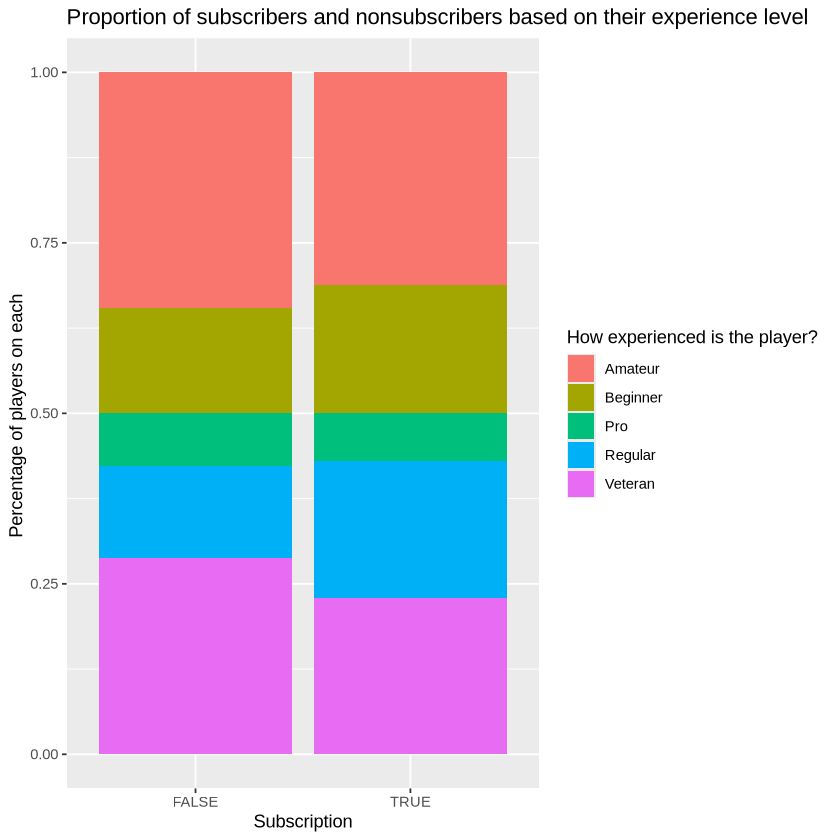

In [38]:
ex_plot <- player_data |>
            ggplot(aes(x = subscribe, fill = experience)) +
            geom_bar(position = "fill") +
            labs(x = "Subscription", y = "Percentage of players on each ", fill = "How experienced is the player?") +
            ggtitle("Proportion of subscribers and nonsubscribers based on their experience level")

ex_plot

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


experience,subscribe,exp_count
<chr>,<lgl>,<int>
Amateur,FALSE,18
Amateur,TRUE,45
Beginner,FALSE,8
Beginner,TRUE,27
Pro,FALSE,4
Pro,TRUE,10
Regular,FALSE,7
Regular,TRUE,29
Veteran,FALSE,15


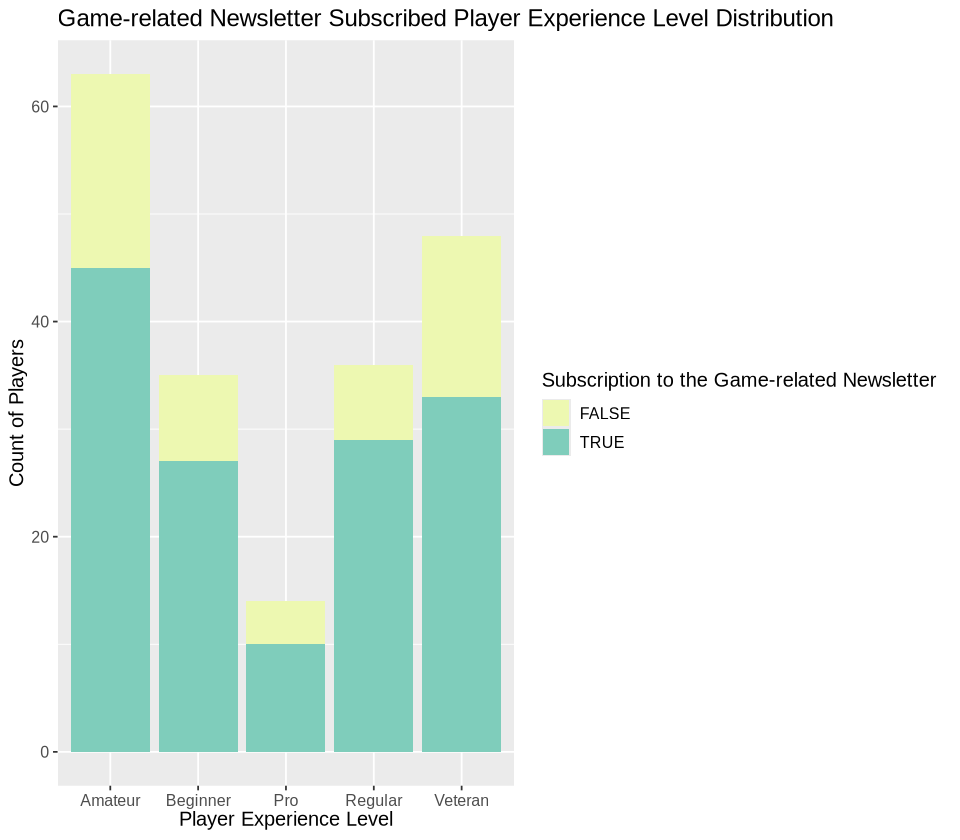

In [55]:
options(repr.plot.height = 7, repr.plot.width = 8)

exp_num <- player_data |>
            # filter(subscribe == "TRUE") |>
            group_by(experience, subscribe) |>
            summarize(exp_count = n())
exp_num

exp_num_chart <- exp_num |>
                ggplot(aes(x = experience, y = exp_count, fill = subscribe)) +
                geom_bar(stat = "identity") +
                labs(x = "Player Experience Level", 
                     y = "Count of Players", 
                     fill = "Subscription to the Game-related Newsletter") +
                ggtitle("Game-related Newsletter Subscribed Player Experience Level Distribution") +
                scale_fill_brewer(palette = 'YlGnBu') +
                theme(text = element_text(size = 12))
exp_num_chart

**Insights:** I observe poor relationship between players experience level with their decision to subscribe to the newsletter. Analyzing each bar as its own, we can observe that they have all similar proportion of players who are subscribed (apprx. more than 75% of players in each experience level subscribed). Therefore it is unlikely to predict whether a player will subscribe to the newsletter basing on their experience level.
**(potential problem)**

`summarise()` has grouped output by 'Age'. You can override using the `.groups`
argument.


Age,subscribe,age_count
<dbl>,<lgl>,<int>
8,TRUE,1
9,TRUE,1
10,TRUE,1
11,TRUE,1
12,TRUE,1
⋮,⋮,⋮
45,FALSE,1
46,FALSE,1
49,TRUE,1


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


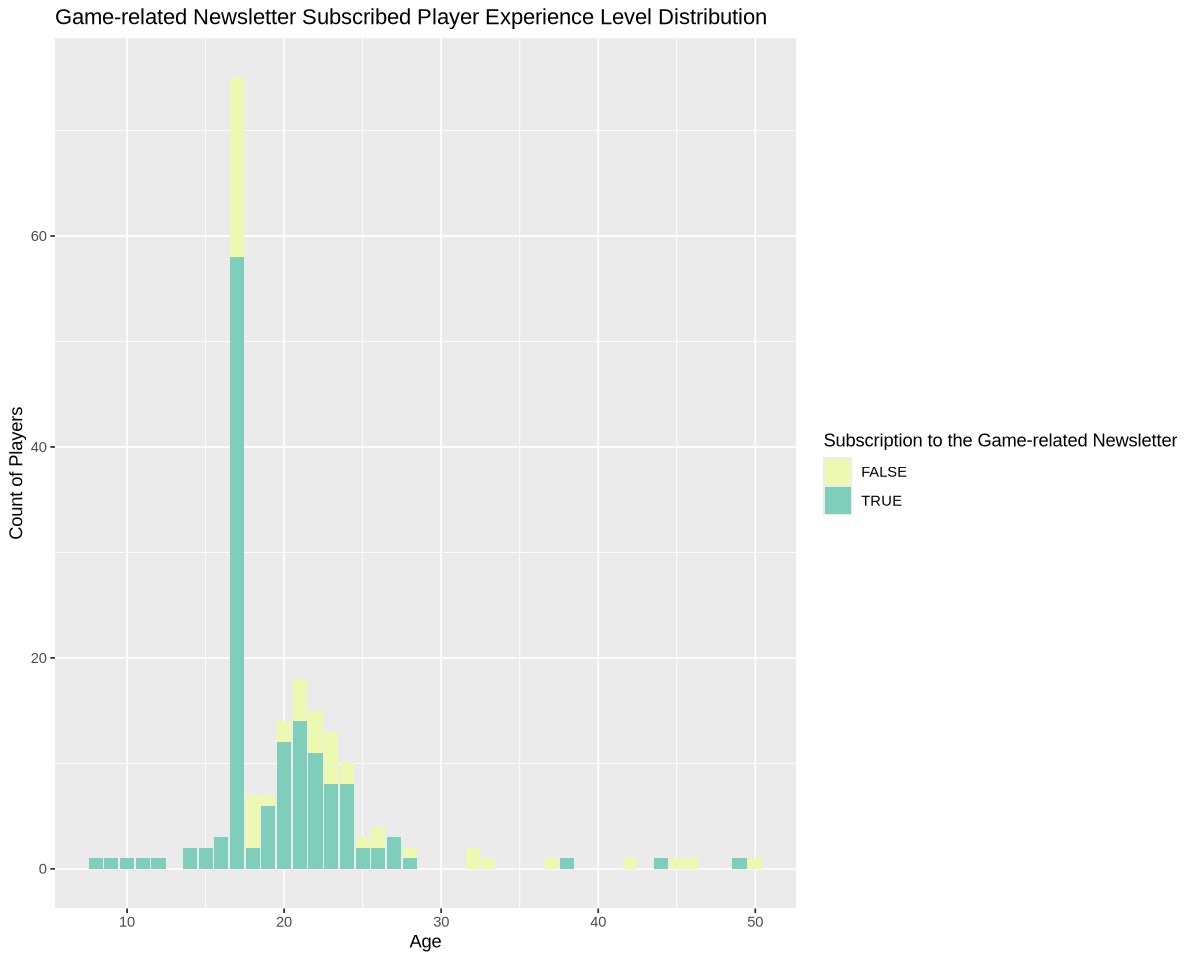

In [56]:
options(repr.plot.height = 8, repr.plot.width = 10)

age_num <- player_data |>
            # filter(subscribe == "TRUE") |>
            group_by(Age, subscribe) |>
            summarize(age_count = n())
age_num

age_num_chart <- age_num |>
                ggplot(aes(x = Age, y = age_count, fill = subscribe)) +
                geom_bar(stat = "identity") +
                labs(x = "Age", 
                     y = "Count of Players", 
                     fill = "Subscription to the Game-related Newsletter") +
                ggtitle("Game-related Newsletter Subscribed Player Experience Level Distribution") +
                scale_fill_brewer(palette = 'YlGnBu')
age_num_chart

## (4)Methods and Plan
